# Ex1: Ziegler & Nichols - Step response

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct

## System

In [2]:
# Definition
K = 2
L = 3
T = 5

num1 = [K]
den1 = [T, 1]

G = ct.tf(num1, den1)*ct.tf(*ct.pade(L, 10))

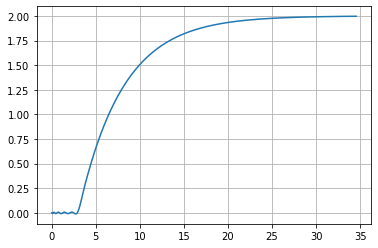

In [3]:
# Response
t1, c1 = ct.step_response(G)
plt.plot(t1, c1)
plt.grid()

## Controller

In [4]:
tsim = 50
dt = 0.1
t = np.arange(0, tsim, dt)

### P controller

Kp: 0.8333


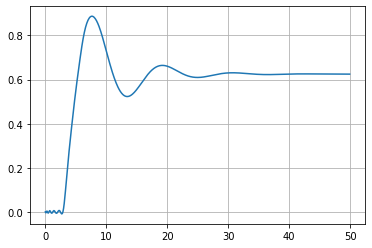

In [5]:
Kp = T/(K*L)
print('Kp: {a:1.4f}'.format(a=Kp))

Gc1 = Kp


t2, c2 = ct.step_response(ct.feedback(Gc1*G), T=t)
plt.plot(t2, c2)
plt.grid()

### PI controller

Kp: 0.7500, Ti: 10.0000


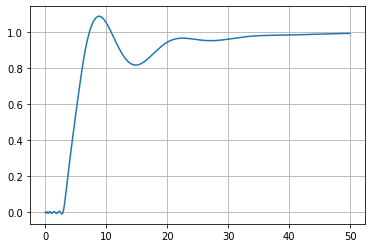

In [6]:
Kp = (0.9*T)/(K*L)
Ti = 10*L/3
print('Kp: {a:1.4f}, Ti: {b:1.4f}'.format(a=Kp, b=Ti))

Gc2 = ct.tf([Kp*Ti, Kp],[Ti, 0])


t3, c3 = ct.step_response(ct.feedback(Gc2*G), T=t)
plt.plot(t3, c3)
plt.grid()

### PID controller

Kp: 1.0000, Ti: 6.0000, Td: 1.5000


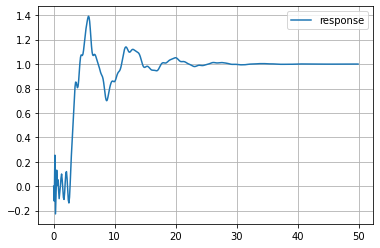

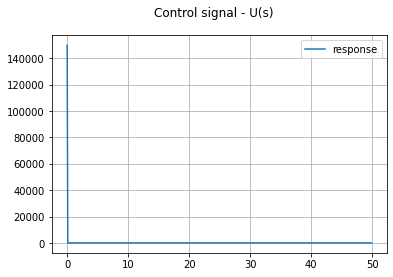

In [20]:
Kp = (1.2*T)/(K*L)
Ti = 2*L
Td = 0.5*L
print('Kp: {a:1.4f}, Ti: {b:1.4f}, Td: {c:1.4f}'.format(a=Kp, b=Ti, c=Td))

P = ct.tf([Kp],[1])
I = ct.tf([1],[Ti, 0])
D = ct.tf([Kp*Td, 0],[0.00001, 1])

Gc3 = P + I + D


t4, c4 = ct.step_response(ct.feedback(Gc3*G), T=t)
plt.plot(t4, c4, label="response")
plt.legend()
plt.grid()

plt.figure()
_, U1 = ct.step_response(ct.feedback(Gc3, G), T=t)
plt.plot(t, U1, label="response")
plt.suptitle("Control signal - U(s)")
plt.legend()
plt.grid()

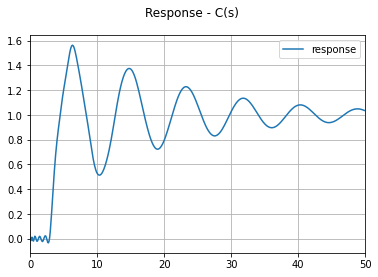

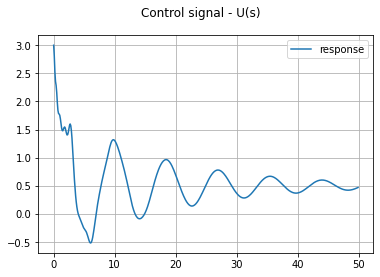

In [21]:
N = 2

Tf = Td / N

P = ct.tf([Kp],[1])
I = ct.tf([1],[Ti, 0])
D = ct.tf([Kp*Td, 0],[Tf, 1])

Gc4 = P + I + D

t5, c5 = ct.step_response(ct.feedback(Gc4*G), T=t)
plt.plot(t5, c5, label="response")
plt.suptitle("Response - C(s)")
plt.legend()
plt.xlim((0, tsim))
plt.grid()

plt.figure()
_, U2 = ct.step_response(ct.feedback(Gc4, G), T=t)
plt.plot(t, U2, label="response")
plt.suptitle("Control signal - U(s)")
plt.legend()
plt.grid()